In [1]:
import sklearn.linear_model as linear_model

/home/jan/Documents/UNI/Aalto/Modeling Biological Networks/Modeling-Biological-Networks-Assignment/venv/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import pandas as pd

# read from txt file to pandas
data_path = 'data/data.txt'
data = pd.read_csv(data_path, sep=' ', header=0)

In [3]:
data.values

array([[0.076 , 0.0419, 0.0207, 0.0225, 0.1033],
       [0.0186, 0.0365, 0.0122, 0.0175, 0.0462],
       [0.009 , 0.0514, 0.0073, 0.0165, 0.0439],
       [0.0117, 0.0473, 0.0079, 0.0147, 0.0371],
       [0.0088, 0.0482, 0.0084, 0.0145, 0.0475],
       [0.0095, 0.0546, 0.01  , 0.0144, 0.0468],
       [0.0075, 0.0648, 0.0096, 0.0106, 0.0347],
       [0.007 , 0.0552, 0.0107, 0.0119, 0.0247],
       [0.0081, 0.0497, 0.0113, 0.0104, 0.0269],
       [0.0057, 0.0352, 0.0116, 0.0142, 0.019 ],
       [0.0052, 0.0358, 0.0073, 0.0084, 0.0134],
       [0.0093, 0.0338, 0.0075, 0.0097, 0.0148],
       [0.0055, 0.0309, 0.0082, 0.0088, 0.0101],
       [0.006 , 0.0232, 0.0078, 0.0087, 0.0088],
       [0.0069, 0.0191, 0.0089, 0.0086, 0.008 ],
       [0.0093, 0.019 , 0.0104, 0.011 , 0.009 ],
       [0.009 , 0.0176, 0.0114, 0.0124, 0.0113],
       [0.0129, 0.0105, 0.01  , 0.0093, 0.0154],
       [0.0022, 0.0081, 0.0086, 0.0079, 0.003 ],
       [0.0018, 0.0072, 0.0078, 0.0103, 0.0012]])

In [4]:
X = data.iloc[:-1]
Y = data.iloc[1:]

In [5]:
lasso = linear_model.Ridge(alpha=0.8, fit_intercept=False)
out = lasso.fit(X,Y)
lasso.coef_

array([[0.00303663, 0.00679496, 0.00194015, 0.00241719, 0.00621076],
       [0.00944903, 0.0328532 , 0.00758593, 0.00997747, 0.02584531],
       [0.00267768, 0.0075731 , 0.00213195, 0.00255545, 0.00591595],
       [0.00361812, 0.00967138, 0.00266273, 0.00332064, 0.00815076],
       [0.00831151, 0.02139565, 0.00522627, 0.00706757, 0.02008124]])

In [6]:
# infer structure from weights...
# arrow exists if weight is non-zero
coefficients = lasso.coef_
structure = (coefficients!=0).flatten()

# indices: all pairs in order


In [7]:
nb_genes = data.shape[1]
gene_names = list(data.columns.values)
pairs = [(gene_names[a],gene_names[b]) for a in range(nb_genes) for b in range(nb_genes)]
len(structure)==len(pairs)

True

In [8]:
model_true_model = {
    'SWI5': [None, 1, 0, 1, 1],
    'CBF1': [0, None, 1, 0, 0],
    'GAL4': [1, 0, None, -0.5, 0],
    'GAL80': [0, 0, -0.5, None, 0],
    'ASH1': [0, -1, 0, 0, None]
}

# dataframe from python dict
model_true = pd.DataFrame(model_true_model, index=gene_names)
true_structure = (model_true.fillna(0)!=0).values.flatten()
true_structure

array([False, False,  True, False, False,  True, False, False, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False, False,  True, False, False, False, False])

In [9]:
model_true

,SWI5,CBF1,GAL4,GAL80,ASH1
SWI5,NaN,0.0,1.0,0.0,0.0
CBF1,1.0,NaN,0.0,0.0,-1.0
GAL4,0.0,1.0,NaN,-0.5,0.0
GAL80,1.0,0.0,-0.5,NaN,0.0
ASH1,1.0,0.0,0.0,0.0,NaN


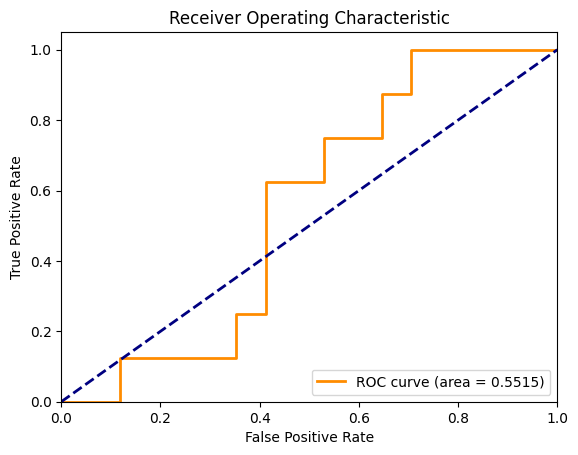

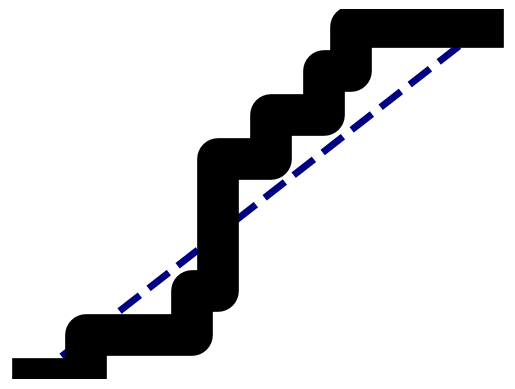

0.2886653045379544


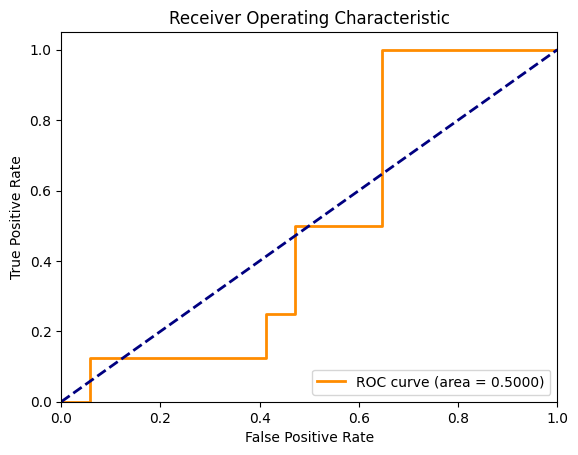

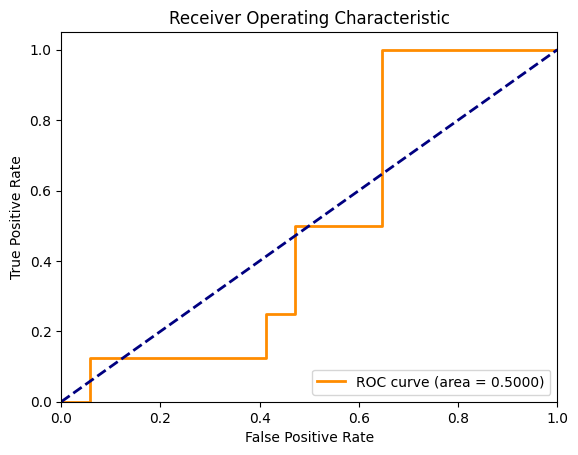

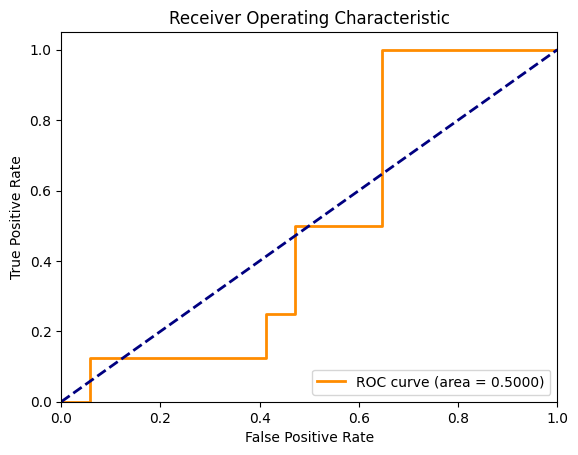

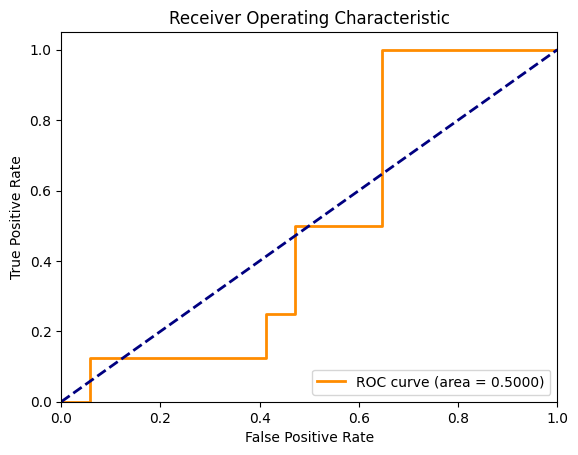

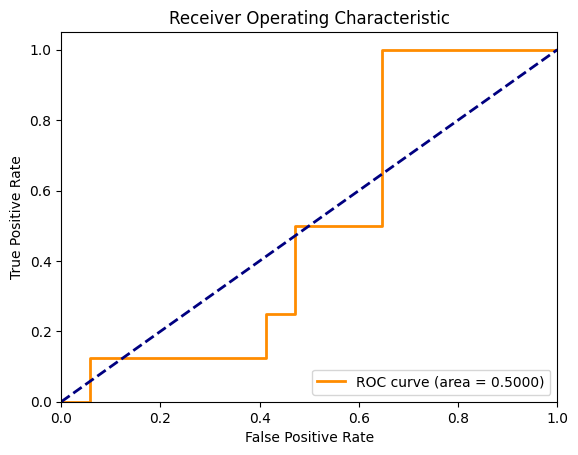

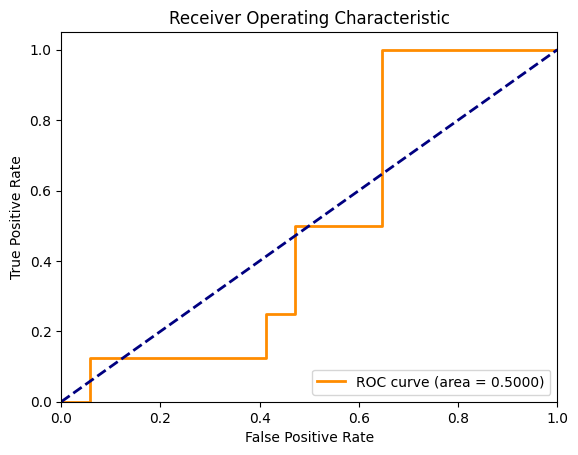

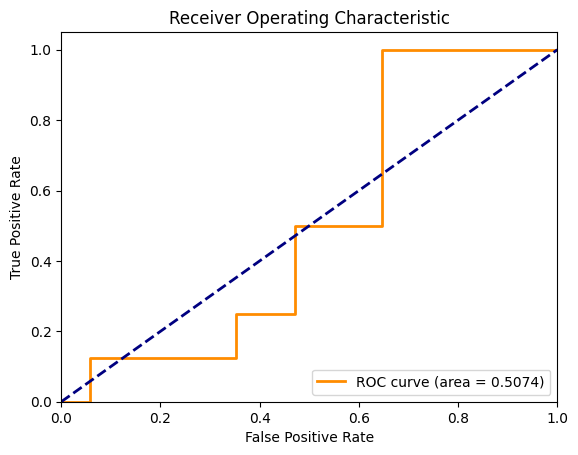

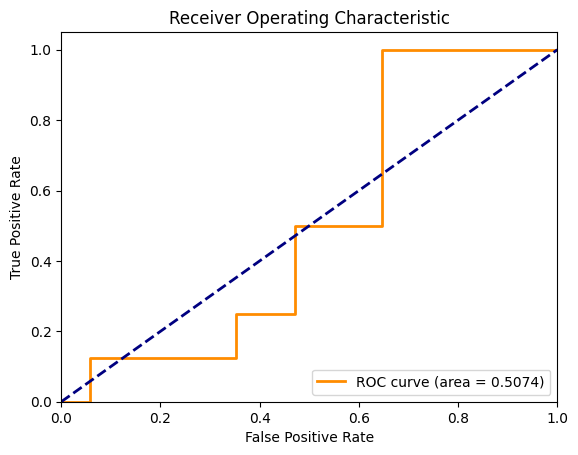

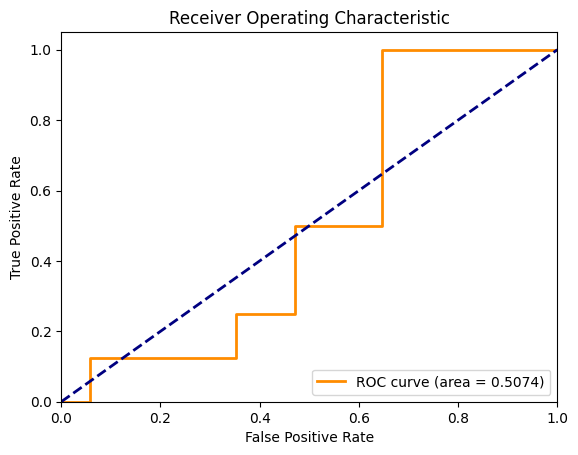

In [24]:
from src.visuals import plot_roc_simplified
# compute tpr and fpr using sklearn
from sklearn.metrics import roc_curve, auc
import numpy as np

alphas = np.linspace(0, 0.9, 10)

for i, alpha in enumerate(alphas):
    #print(f'alpha: {alpha}\n')
    lasso = linear_model.Ridge(alpha=alpha, fit_intercept=False)
    out = lasso.fit(X,Y)
    coefficients = lasso.coef_
    #print(f'cofficients: {coefficients}\n')
    
    coefficients[range(5),range(5)] = 0
    #print(f'np.abs(coefficients.T.flatten()) {np.abs(coefficients.T.flatten())}')
    #print(np.abs(coefficients.T.flatten()).argsort())
    fpr, tpr, thresholds = roc_curve(true_structure, np.abs(coefficients.T.flatten()))
    # compute fpr and tpr for 
    #print(f'fpr: {fpr}\n')
    roc_auc = auc(fpr, tpr)

    # plot roc curve
    import matplotlib.pyplot as plt
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
    # add the random line
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
        
    if i == 0:
        plot_roc_simplified(fpr, tpr)
        
        vals = []
        for tps, fps in zip(list(tpr), list(fpr)):
            vals.append(np.sqrt(tps ** 2 + (1 - fps) ** 2))
        
        print(thresholds[vals.index(min(vals))])
    
#     i = input('press enter to continue')
#     if i == 'q':
#         break


In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchdiffeq import odeint

class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size, bias=False)
        
    def ode_function(self, t, x):
        return self.linear(x)
        
    def forward(self, x):
        # return self.linear(x)
        # define the forward function as an ODE
        t = torch.linspace(0, 10, 10)

        # Solve the ODE
        solution = odeint(self.ode_function, y0=x, t=t)
        
        return solution[-1]
    

Epoch 1, loss: 0.746926
Epoch 2, loss: 0.231063
Epoch 3, loss: 0.063982
Epoch 4, loss: 0.034063
Epoch 5, loss: 0.041754
Epoch 6, loss: 0.044191
Epoch 7, loss: 0.038167
Epoch 8, loss: 0.029262
Epoch 9, loss: 0.021193
Epoch 10, loss: 0.015150
Epoch 11, loss: 0.011037
Epoch 12, loss: 0.008373
Epoch 13, loss: 0.006692
Epoch 14, loss: 0.005640
Epoch 15, loss: 0.004981
Epoch 16, loss: 0.004564
Epoch 17, loss: 0.004294
Epoch 18, loss: 0.004114
Epoch 19, loss: 0.003987
Epoch 20, loss: 0.003893
Epoch 21, loss: 0.003817
Epoch 22, loss: 0.003753
Epoch 23, loss: 0.003695
Epoch 24, loss: 0.003640
Epoch 25, loss: 0.003587
Epoch 26, loss: 0.003534
Epoch 27, loss: 0.003482
Epoch 28, loss: 0.003429
Epoch 29, loss: 0.003377
Epoch 30, loss: 0.003324
Epoch 31, loss: 0.003271
Epoch 32, loss: 0.003219
Epoch 33, loss: 0.003167
Epoch 34, loss: 0.003115
Epoch 35, loss: 0.003063
Epoch 36, loss: 0.003012
Epoch 37, loss: 0.002962
Epoch 38, loss: 0.002912
Epoch 39, loss: 0.002863
Epoch 40, loss: 0.002814
Epoch 41,

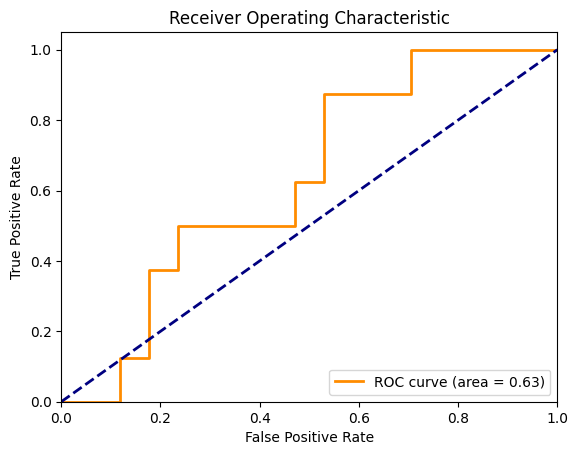

Epoch 1, loss: 0.478259
Epoch 2, loss: 0.279049
Epoch 3, loss: 0.195474
Epoch 4, loss: 0.157500
Epoch 5, loss: 0.138273
Epoch 6, loss: 0.127307
Epoch 7, loss: 0.120243
Epoch 8, loss: 0.115139
Epoch 9, loss: 0.111072
Epoch 10, loss: 0.107581
Epoch 11, loss: 0.104422
Epoch 12, loss: 0.101464
Epoch 13, loss: 0.098634
Epoch 14, loss: 0.095892
Epoch 15, loss: 0.093215
Epoch 16, loss: 0.090590
Epoch 17, loss: 0.088011
Epoch 18, loss: 0.085475
Epoch 19, loss: 0.082979
Epoch 20, loss: 0.080525
Epoch 21, loss: 0.078112
Epoch 22, loss: 0.075741
Epoch 23, loss: 0.073414
Epoch 24, loss: 0.071132
Epoch 25, loss: 0.068897
Epoch 26, loss: 0.066711
Epoch 27, loss: 0.064576
Epoch 28, loss: 0.062493
Epoch 29, loss: 0.060466
Epoch 30, loss: 0.058494
Epoch 31, loss: 0.056581
Epoch 32, loss: 0.054726
Epoch 33, loss: 0.052931
Epoch 34, loss: 0.051197
Epoch 35, loss: 0.049522
Epoch 36, loss: 0.047906
Epoch 37, loss: 0.046349
Epoch 38, loss: 0.044849
Epoch 39, loss: 0.043405
Epoch 40, loss: 0.042014
Epoch 41,

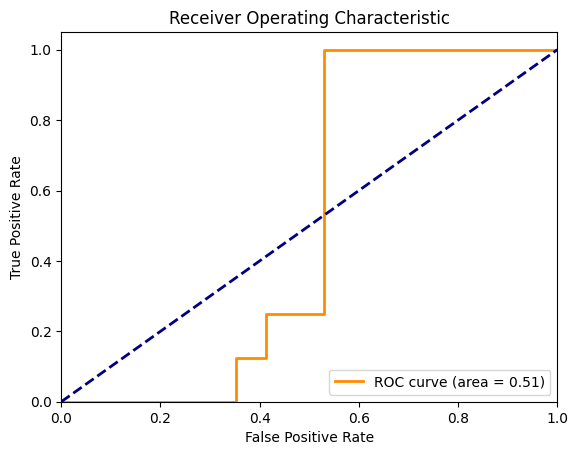

Epoch 1, loss: 1.065201
Epoch 2, loss: 0.645408
Epoch 3, loss: 0.493979
Epoch 4, loss: 0.430312
Epoch 5, loss: 0.397802
Epoch 6, loss: 0.377592
Epoch 7, loss: 0.362788
Epoch 8, loss: 0.350619
Epoch 9, loss: 0.339873
Epoch 10, loss: 0.329980
Epoch 11, loss: 0.320654
Epoch 12, loss: 0.311744
Epoch 13, loss: 0.303168
Epoch 14, loss: 0.294878
Epoch 15, loss: 0.286845
Epoch 16, loss: 0.279051
Epoch 17, loss: 0.271484
Epoch 18, loss: 0.264136
Epoch 19, loss: 0.256999
Epoch 20, loss: 0.250067
Epoch 21, loss: 0.243336
Epoch 22, loss: 0.236801
Epoch 23, loss: 0.230457
Epoch 24, loss: 0.224301
Epoch 25, loss: 0.218329
Epoch 26, loss: 0.212538
Epoch 27, loss: 0.206924
Epoch 28, loss: 0.201485
Epoch 29, loss: 0.196219
Epoch 30, loss: 0.191121
Epoch 31, loss: 0.186188
Epoch 32, loss: 0.181418
Epoch 33, loss: 0.176806
Epoch 34, loss: 0.172348
Epoch 35, loss: 0.168040
Epoch 36, loss: 0.163877
Epoch 37, loss: 0.159853
Epoch 38, loss: 0.155963
Epoch 39, loss: 0.152202
Epoch 40, loss: 0.148564
Epoch 41,

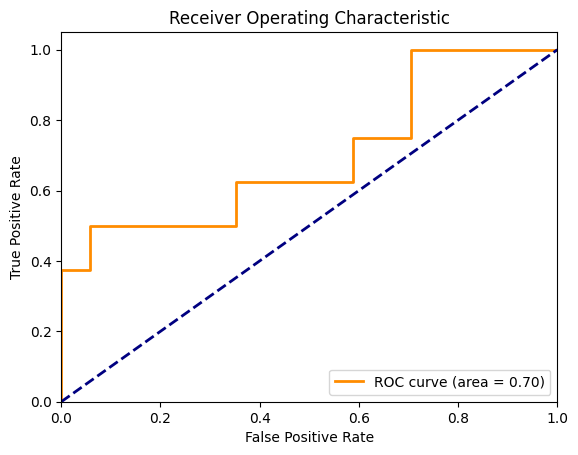

Epoch 1, loss: 0.920086
Epoch 2, loss: 0.721149
Epoch 3, loss: 0.618533
Epoch 4, loss: 0.568990
Epoch 5, loss: 0.541415
Epoch 6, loss: 0.518283
Epoch 7, loss: 0.494494
Epoch 8, loss: 0.470709
Epoch 9, loss: 0.448177
Epoch 10, loss: 0.427301
Epoch 11, loss: 0.407917
Epoch 12, loss: 0.389713
Epoch 13, loss: 0.372418
Epoch 14, loss: 0.355848
Epoch 15, loss: 0.339887
Epoch 16, loss: 0.324468
Epoch 17, loss: 0.309553
Epoch 18, loss: 0.295119
Epoch 19, loss: 0.281155
Epoch 20, loss: 0.267654
Epoch 21, loss: 0.254611
Epoch 22, loss: 0.242024
Epoch 23, loss: 0.229889
Epoch 24, loss: 0.218205
Epoch 25, loss: 0.206967
Epoch 26, loss: 0.196171
Epoch 27, loss: 0.185813
Epoch 28, loss: 0.175884
Epoch 29, loss: 0.166380
Epoch 30, loss: 0.157290
Epoch 31, loss: 0.148607
Epoch 32, loss: 0.140319
Epoch 33, loss: 0.132417
Epoch 34, loss: 0.124889
Epoch 35, loss: 0.117723
Epoch 36, loss: 0.110907
Epoch 37, loss: 0.104430
Epoch 38, loss: 0.098279
Epoch 39, loss: 0.092441
Epoch 40, loss: 0.086906
Epoch 41,

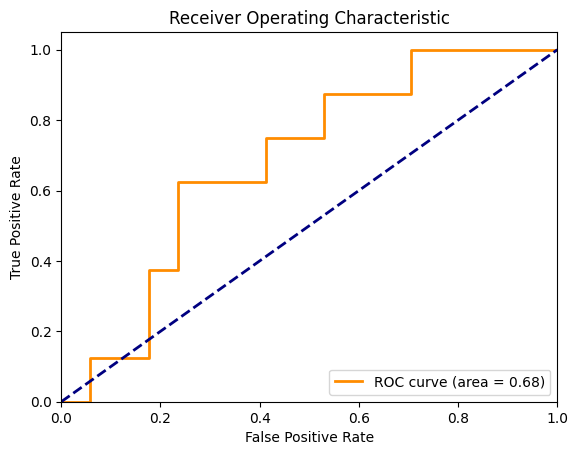

Epoch 1, loss: 0.541871
Epoch 2, loss: 0.494274
Epoch 3, loss: 0.452775
Epoch 4, loss: 0.415020
Epoch 5, loss: 0.380290
Epoch 6, loss: 0.348205
Epoch 7, loss: 0.318504
Epoch 8, loss: 0.290998
Epoch 9, loss: 0.265537
Epoch 10, loss: 0.241987
Epoch 11, loss: 0.220218
Epoch 12, loss: 0.200112
Epoch 13, loss: 0.181561
Epoch 14, loss: 0.164467
Epoch 15, loss: 0.148739
Epoch 16, loss: 0.134293
Epoch 17, loss: 0.121046
Epoch 18, loss: 0.108921
Epoch 19, loss: 0.097841
Epoch 20, loss: 0.087732
Epoch 21, loss: 0.078518
Epoch 22, loss: 0.070128
Epoch 23, loss: 0.062496
Epoch 24, loss: 0.055560
Epoch 25, loss: 0.049265
Epoch 26, loss: 0.043563
Epoch 27, loss: 0.038412
Epoch 28, loss: 0.033773
Epoch 29, loss: 0.029610
Epoch 30, loss: 0.025890
Epoch 31, loss: 0.022579
Epoch 32, loss: 0.019643
Epoch 33, loss: 0.017048
Epoch 34, loss: 0.014760
Epoch 35, loss: 0.012749
Epoch 36, loss: 0.010986
Epoch 37, loss: 0.009444
Epoch 38, loss: 0.008100
Epoch 39, loss: 0.006935
Epoch 40, loss: 0.005932
Epoch 41,

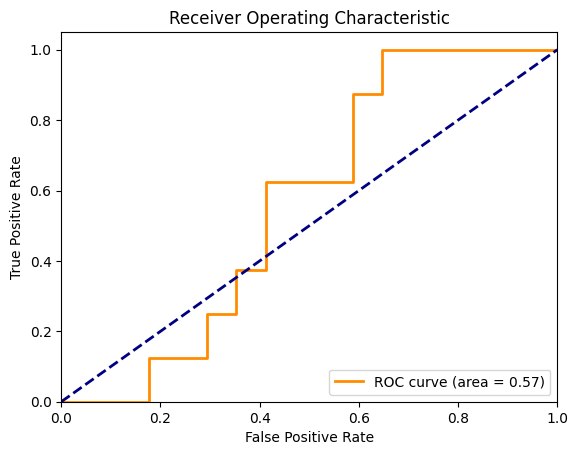

Epoch 1, loss: 1.319040
Epoch 2, loss: 1.039105
Epoch 3, loss: 0.936975
Epoch 4, loss: 0.882134
Epoch 5, loss: 0.839027
Epoch 6, loss: 0.799790
Epoch 7, loss: 0.762826
Epoch 8, loss: 0.727788
Epoch 9, loss: 0.694523
Epoch 10, loss: 0.662881
Epoch 11, loss: 0.632709
Epoch 12, loss: 0.603859
Epoch 13, loss: 0.576205
Epoch 14, loss: 0.549639
Epoch 15, loss: 0.524077
Epoch 16, loss: 0.499448
Epoch 17, loss: 0.475701
Epoch 18, loss: 0.452795
Epoch 19, loss: 0.430698
Epoch 20, loss: 0.409387
Epoch 21, loss: 0.388844
Epoch 22, loss: 0.369056
Epoch 23, loss: 0.350012
Epoch 24, loss: 0.331704
Epoch 25, loss: 0.314123
Epoch 26, loss: 0.297262
Epoch 27, loss: 0.281112
Epoch 28, loss: 0.265665
Epoch 29, loss: 0.250911
Epoch 30, loss: 0.236839
Epoch 31, loss: 0.223436
Epoch 32, loss: 0.210688
Epoch 33, loss: 0.198580
Epoch 34, loss: 0.187095
Epoch 35, loss: 0.176215
Epoch 36, loss: 0.165921
Epoch 37, loss: 0.156193
Epoch 38, loss: 0.147010
Epoch 39, loss: 0.138350
Epoch 40, loss: 0.130192
Epoch 41,

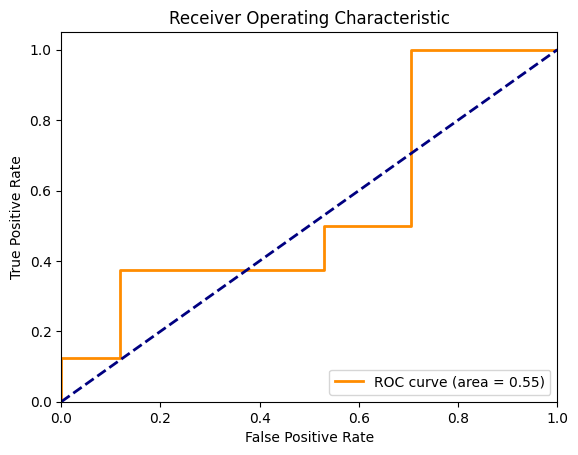

Epoch 1, loss: 258.545532
Epoch 2, loss: 82.593109
Epoch 3, loss: 29.133541
Epoch 4, loss: 11.698711
Epoch 5, loss: 5.523767
Epoch 6, loss: 3.186288
Epoch 7, loss: 2.258543
Epoch 8, loss: 1.878709
Epoch 9, loss: 1.720012
Epoch 10, loss: 1.652311
Epoch 11, loss: 1.622035
Epoch 12, loss: 1.606754
Epoch 13, loss: 1.597093
Epoch 14, loss: 1.589245
Epoch 15, loss: 1.581775
Epoch 16, loss: 1.574240
Epoch 17, loss: 1.566592
Epoch 18, loss: 1.558909
Epoch 19, loss: 1.551302
Epoch 20, loss: 1.543864
Epoch 21, loss: 1.536663
Epoch 22, loss: 1.529747
Epoch 23, loss: 1.523138
Epoch 24, loss: 1.516845
Epoch 25, loss: 1.510868
Epoch 26, loss: 1.505196
Epoch 27, loss: 1.499815
Epoch 28, loss: 1.494708
Epoch 29, loss: 1.489857
Epoch 30, loss: 1.485244
Epoch 31, loss: 1.480849
Epoch 32, loss: 1.476655
Epoch 33, loss: 1.472646
Epoch 34, loss: 1.468806
Epoch 35, loss: 1.465119
Epoch 36, loss: 1.461573
Epoch 37, loss: 1.458156
Epoch 38, loss: 1.454856
Epoch 39, loss: 1.451664
Epoch 40, loss: 1.448569
Epoc

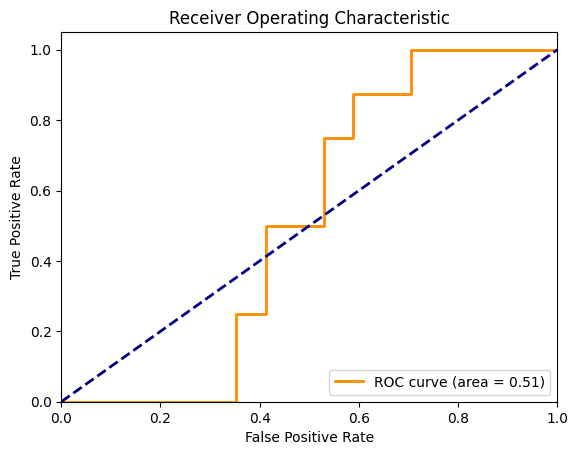

Epoch 1, loss: 2.343713
Epoch 2, loss: 1.534355
Epoch 3, loss: 1.285368
Epoch 4, loss: 1.195241
Epoch 5, loss: 1.150256
Epoch 6, loss: 1.118548
Epoch 7, loss: 1.090798
Epoch 8, loss: 1.064187
Epoch 9, loss: 1.037870
Epoch 10, loss: 1.011620
Epoch 11, loss: 0.985405
Epoch 12, loss: 0.959248
Epoch 13, loss: 0.933184
Epoch 14, loss: 0.907251
Epoch 15, loss: 0.881485
Epoch 16, loss: 0.855920
Epoch 17, loss: 0.830588
Epoch 18, loss: 0.805521
Epoch 19, loss: 0.780750
Epoch 20, loss: 0.756305
Epoch 21, loss: 0.732213
Epoch 22, loss: 0.708503
Epoch 23, loss: 0.685200
Epoch 24, loss: 0.662326
Epoch 25, loss: 0.639903
Epoch 26, loss: 0.617951
Epoch 27, loss: 0.596486
Epoch 28, loss: 0.575522
Epoch 29, loss: 0.555071
Epoch 30, loss: 0.535143
Epoch 31, loss: 0.515745
Epoch 32, loss: 0.496883
Epoch 33, loss: 0.478559
Epoch 34, loss: 0.460775
Epoch 35, loss: 0.443531
Epoch 36, loss: 0.426823
Epoch 37, loss: 0.410647
Epoch 38, loss: 0.394999
Epoch 39, loss: 0.379872
Epoch 40, loss: 0.365258
Epoch 41,

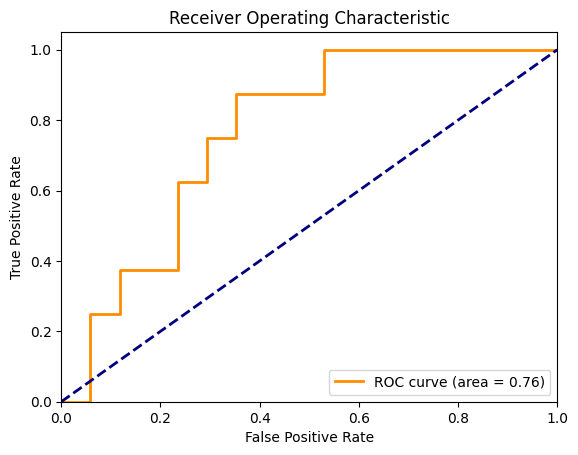

Epoch 1, loss: 6.843303
Epoch 2, loss: 2.638764
Epoch 3, loss: 1.890776
Epoch 4, loss: 1.845452
Epoch 5, loss: 1.898133
Epoch 6, loss: 1.935777
Epoch 7, loss: 1.946815
Epoch 8, loss: 1.937847
Epoch 9, loss: 1.916377
Epoch 10, loss: 1.887887
Epoch 11, loss: 1.855926
Epoch 12, loss: 1.822668
Epoch 13, loss: 1.789382
Epoch 14, loss: 1.756775
Epoch 15, loss: 1.725207
Epoch 16, loss: 1.694830
Epoch 17, loss: 1.665674
Epoch 18, loss: 1.637705
Epoch 19, loss: 1.610853
Epoch 20, loss: 1.585032
Epoch 21, loss: 1.560154
Epoch 22, loss: 1.536132
Epoch 23, loss: 1.512889
Epoch 24, loss: 1.490350
Epoch 25, loss: 1.468451
Epoch 26, loss: 1.447135
Epoch 27, loss: 1.426354
Epoch 28, loss: 1.406063
Epoch 29, loss: 1.386226
Epoch 30, loss: 1.366808
Epoch 31, loss: 1.347783
Epoch 32, loss: 1.329126
Epoch 33, loss: 1.310815
Epoch 34, loss: 1.292831
Epoch 35, loss: 1.275159
Epoch 36, loss: 1.257785
Epoch 37, loss: 1.240694
Epoch 38, loss: 1.223878
Epoch 39, loss: 1.207325
Epoch 40, loss: 1.191027
Epoch 41,

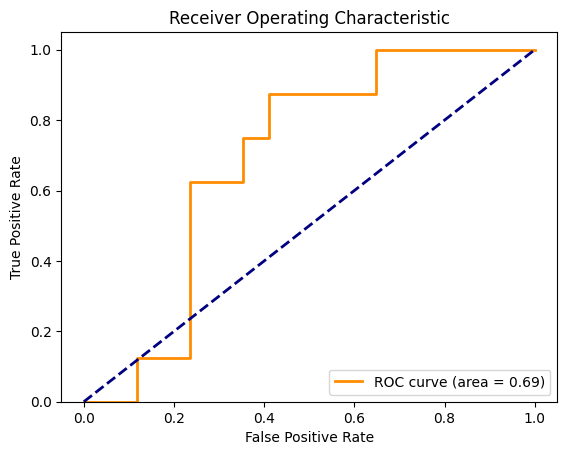

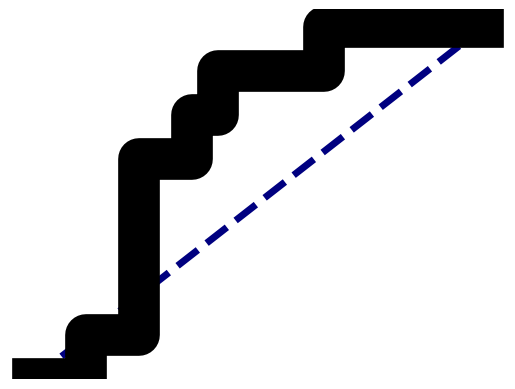

0.20416555


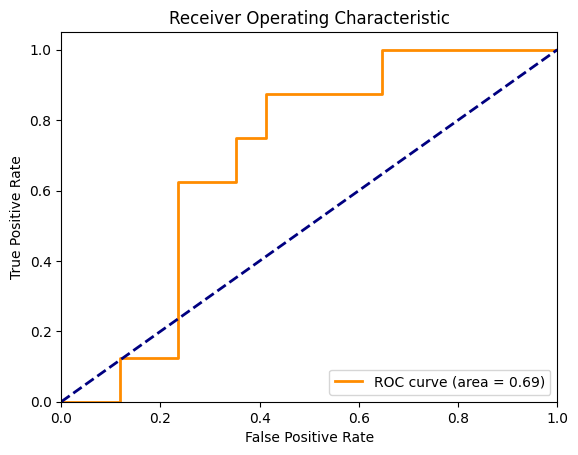

Epoch 1, loss: 1.920575
Epoch 2, loss: 1.798045
Epoch 3, loss: 1.680539
Epoch 4, loss: 1.567915
Epoch 5, loss: 1.460075
Epoch 6, loss: 1.356990
Epoch 7, loss: 1.258662
Epoch 8, loss: 1.165113
Epoch 9, loss: 1.076363
Epoch 10, loss: 0.992417
Epoch 11, loss: 0.913274
Epoch 12, loss: 0.838913
Epoch 13, loss: 0.769283
Epoch 14, loss: 0.704293
Epoch 15, loss: 0.643823
Epoch 16, loss: 0.587739
Epoch 17, loss: 0.535891
Epoch 18, loss: 0.488121
Epoch 19, loss: 0.444246
Epoch 20, loss: 0.404055
Epoch 21, loss: 0.367316
Epoch 22, loss: 0.333773
Epoch 23, loss: 0.303166
Epoch 24, loss: 0.275239
Epoch 25, loss: 0.249744
Epoch 26, loss: 0.226448
Epoch 27, loss: 0.205139
Epoch 28, loss: 0.185631
Epoch 29, loss: 0.167762
Epoch 30, loss: 0.151396
Epoch 31, loss: 0.136416
Epoch 32, loss: 0.122717
Epoch 33, loss: 0.110205
Epoch 34, loss: 0.098794
Epoch 35, loss: 0.088407
Epoch 36, loss: 0.078974
Epoch 37, loss: 0.070430
Epoch 38, loss: 0.062714
Epoch 39, loss: 0.055765
Epoch 40, loss: 0.049525
Epoch 41,

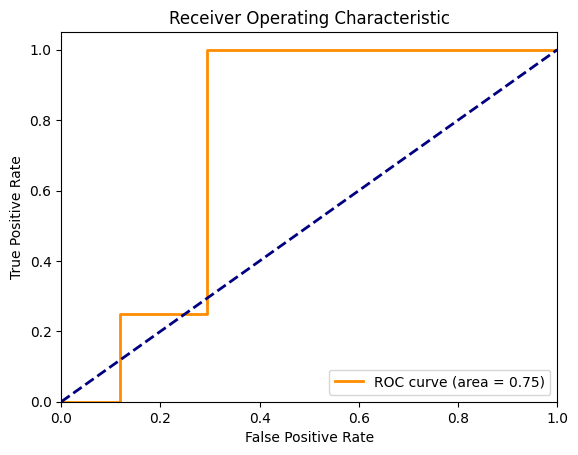

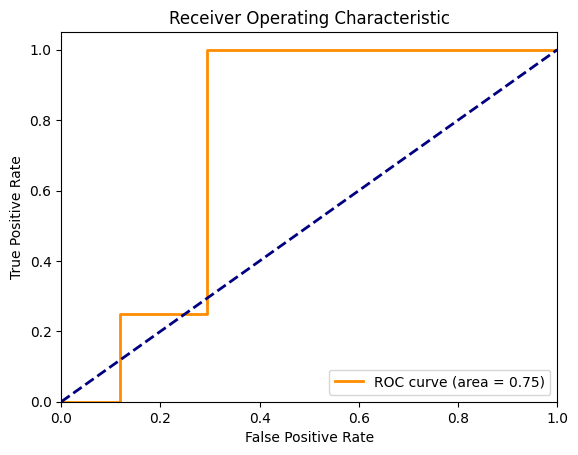

In [34]:
from src.visuals import plot_roc
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt


class XYDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]


# Assume df_x and df_y are your DataFrames for features and targets
dataset = XYDataset(X, Y)

train_loader = DataLoader(dataset, batch_size=32, shuffle=True)
#train_loader = torch.utils.data.DataLoader(data.values, batch_size=4, shuffle=True, num_workers=2)

alphas = np.linspace(0, 1., 10)
for k, alpha in enumerate(alphas):
    # define the training code
    #epochs = 40000
    epochs = 100
    net = LinearModel(5, 5)  # +1 for time
    criterion = nn.MSELoss()
    #optimizer = optim.SGD(net.parameters(), lr=1., momentum=0.9)
    optimizer = optim.Adam(net.parameters(), lr=0.01)

    for epoch in range(epochs):
        for i, batch in enumerate(train_loader):
            inputs, labels = batch
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels) + alpha * net.linear.weight.norm(2) ** 2
            loss.backward()
            optimizer.step()

        print('Epoch %d, loss: %.6f' % (epoch + 1, loss.item()))

    th = 1e-8
    weights = net.linear.weight.detach().numpy()
    weights[range(5), range(5)] = 0
    structure = np.abs(weights) > th

    # compute tpr and fpr using sklearn
    fpr, tpr, thresholds = roc_curve(true_structure, np.abs(weights.T.flatten()))
    roc_auc = auc(fpr, tpr)


    if k == 8:
        plot_roc(fpr, tpr, "Receiver Operating Characteristic")
        plot_roc_simplified(fpr, tpr)
        
        vals = []
        for tps, fps in zip(list(tpr), list(fpr)):
            vals.append(np.sqrt(tps ** 2 + (1 - fps) ** 2))
        
        print(thresholds[vals.index(min(vals))])
    
    
    # plot roc curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    # add the random line
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

first = net.linear.weight
first
net.linear.weight
th = 1e-8
weights = net.linear.weight.detach().numpy()
weights[range(5), range(5)] = 0
structure = np.abs(weights) > th

# compute tpr and fpr using sklearn
from sklearn.metrics import roc_curve, auc
import numpy as np

fpr, tpr, thresholds = roc_curve(true_structure, np.abs(weights.T.flatten()))
roc_auc = auc(fpr, tpr)

# plot roc curve
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
# add the random line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Epoch 1, loss: 2968.210205
Epoch 2, loss: 1275.819458
Epoch 3, loss: 598.319275
Epoch 4, loss: 308.174957
Epoch 5, loss: 172.854126
Epoch 6, loss: 104.355087
Epoch 7, loss: 67.087280
Epoch 8, loss: 45.517727
Epoch 9, loss: 32.357555
Epoch 10, loss: 23.957298
Epoch 11, loss: 18.382664
Epoch 12, loss: 14.556368
Epoch 13, loss: 11.851660
Epoch 14, loss: 9.889705
Epoch 15, loss: 8.433736
Epoch 16, loss: 7.331166
Epoch 17, loss: 6.481042
Epoch 18, loss: 5.814930
Epoch 19, loss: 5.285419
Epoch 20, loss: 4.858995
Epoch 21, loss: 4.511558
Epoch 22, loss: 4.225471
Epoch 23, loss: 3.987640
Epoch 24, loss: 3.788211
Epoch 25, loss: 3.619661
Epoch 26, loss: 3.476188
Epoch 27, loss: 3.353262
Epoch 28, loss: 3.247317
Epoch 29, loss: 3.155507
Epoch 30, loss: 3.075553
Epoch 31, loss: 3.005598
Epoch 32, loss: 2.944139
Epoch 33, loss: 2.889935
Epoch 34, loss: 2.841954
Epoch 35, loss: 2.799341
Epoch 36, loss: 2.761377
Epoch 37, loss: 2.727455
Epoch 38, loss: 2.697062
Epoch 39, loss: 2.669761
Epoch 40, los

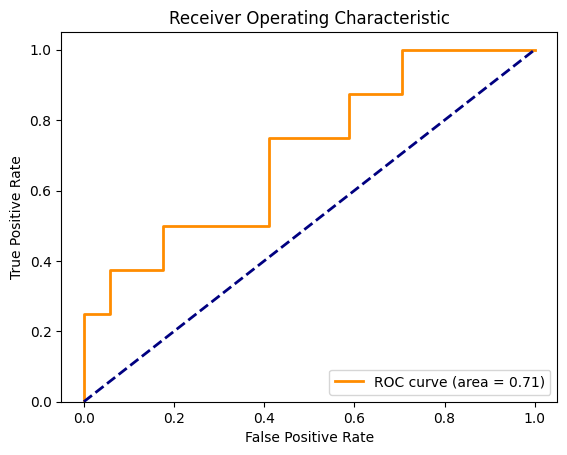

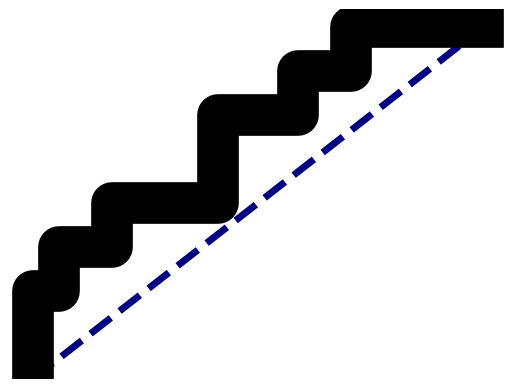

0.23770414


In [43]:
# define the training code
#epochs = 40000
alpha = 0.9
epochs = 100
net = LinearModel(5, 5)  # +1 for time
criterion = nn.MSELoss()
#optimizer = optim.SGD(net.parameters(), lr=1., momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.01)

for epoch in range(epochs):
    for i, batch in enumerate(train_loader):
        inputs, labels = batch
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels) + alpha * net.linear.weight.norm(2) ** 2
        loss.backward()
        optimizer.step()

    print('Epoch %d, loss: %.6f' % (epoch + 1, loss.item()))

th = 1e-8
weights = net.linear.weight.detach().numpy()
weights[range(5), range(5)] = 0
structure = np.abs(weights) > th

# compute tpr and fpr using sklearn
fpr, tpr, thresholds = roc_curve(true_structure, np.abs(weights.T.flatten()))
roc_auc = auc(fpr, tpr)

plot_roc(fpr, tpr, "Receiver Operating Characteristic")
plot_roc_simplified(fpr, tpr)

vals = []
for tps, fps in zip(list(tpr), list(fpr)):
    vals.append(np.sqrt(tps ** 2 + (1 - fps) ** 2))

print(thresholds[vals.index(min(vals))])

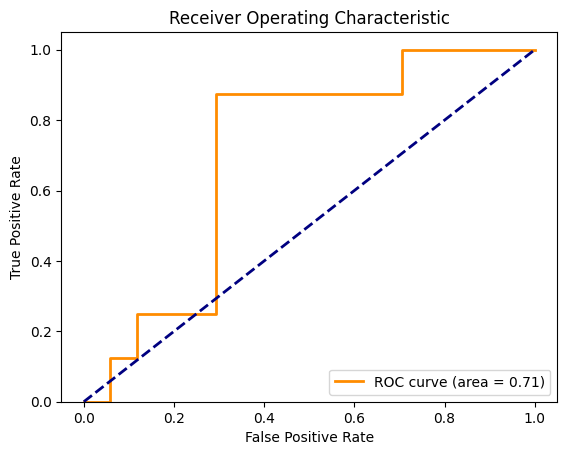

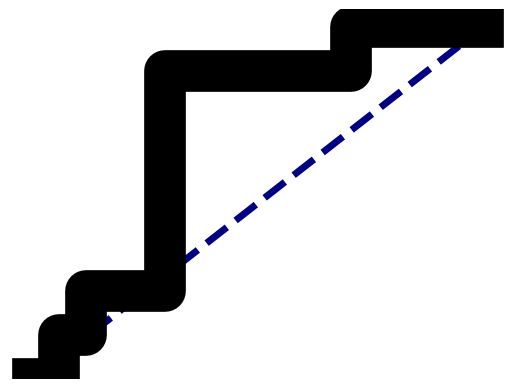

0.0012614328


In [36]:

plot_roc(fpr, tpr, "Receiver Operating Characteristic")
plot_roc_simplified(fpr, tpr)

vals = []
for tps, fps in zip(list(tpr), list(fpr)):
    vals.append(np.sqrt(tps ** 2 + (1 - fps) ** 2))

print(thresholds[vals.index(min(vals))])

In [33]:
# compute tpr and fpr using sklearn
from sklearn.metrics import roc_curve, auc
import numpy as np

fpr, tpr, thresholds = roc_curve(true_structure, np.abs(weights.T.flatten()))
roc_auc = auc(fpr, tpr)

# plot roc curve
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
# add the random line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("test.svg")
plt.show()

plot_roc_simplified(fpr, tpr)

vals = []
for tps, fps in zip(list(tpr), list(fpr)):
    vals.append(np.sqrt(tps ** 2 + (1 - fps) ** 2))

print(thresholds[vals.index(min(vals))])


NameError: name 'weights' is not defined